##### Import Libraries

In [24]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

##### Load Data

In [25]:
df = pd.read_csv("diabetes.csv")         # Reading the dataset to Data Frame

##### Explore Data

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The statistics about the dataset

In [27]:
df.shape

(768, 9)

In [28]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
y=df["Outcome"]                                                     # predict this (Dependent Variable)
x=df.drop(columns = ["Outcome"] )

Split the Dataset for Testing and Training

### Train the model

In [33]:
def try_depth(max=10):
    for max_depth in range(1, max+1):
        tree_clf = DecisionTreeClassifier(max_depth=max_depth)
        tree_clf.fit(x, y)
        print(f'Depth: {max_depth}, score: {tree_clf.score(x, y)}')

In [34]:
try_depth(50)

Depth: 1, score: 0.7356770833333334
Depth: 2, score: 0.7721354166666666
Depth: 3, score: 0.7760416666666666
Depth: 4, score: 0.7916666666666666
Depth: 5, score: 0.8372395833333334
Depth: 6, score: 0.8515625
Depth: 7, score: 0.89453125
Depth: 8, score: 0.9309895833333334
Depth: 9, score: 0.9583333333333334
Depth: 10, score: 0.9752604166666666
Depth: 11, score: 0.98828125
Depth: 12, score: 0.9986979166666666
Depth: 13, score: 1.0
Depth: 14, score: 1.0
Depth: 15, score: 1.0
Depth: 16, score: 1.0
Depth: 17, score: 1.0
Depth: 18, score: 1.0
Depth: 19, score: 1.0
Depth: 20, score: 1.0
Depth: 21, score: 1.0
Depth: 22, score: 1.0
Depth: 23, score: 1.0
Depth: 24, score: 1.0
Depth: 25, score: 1.0
Depth: 26, score: 1.0
Depth: 27, score: 1.0
Depth: 28, score: 1.0
Depth: 29, score: 1.0
Depth: 30, score: 1.0
Depth: 31, score: 1.0
Depth: 32, score: 1.0
Depth: 33, score: 1.0
Depth: 34, score: 1.0
Depth: 35, score: 1.0
Depth: 36, score: 1.0
Depth: 37, score: 1.0
Depth: 38, score: 1.0
Depth: 39, score: 

In [35]:
tree_clf = DecisionTreeClassifier(max_depth=14)
tree_clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
export_graphviz(
                 tree_clf,
                 out_file="diabetes_result.dot",
                 feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
                 class_names=["0","1"],
                 rounded=True,
                 filled=True
                )

### Accuracy of the model:

In [37]:
print("Accuracy: {:.3f}".format(tree_clf.score(x, y)))

Accuracy: 1.000


In [38]:
tree_clf.feature_importances_

array([0.05495536, 0.33900892, 0.09810352, 0.01869923, 0.02978181,
       0.22007119, 0.1291876 , 0.11019237])

In [39]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [40]:
import matplotlib.pyplot as plt

<BarContainer object of 8 artists>

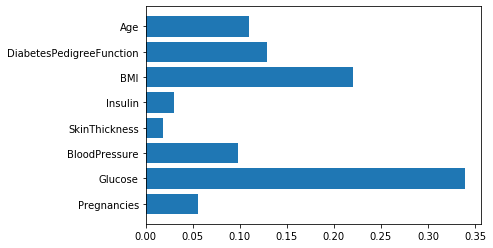

In [41]:
plt.barh(x.columns,tree_clf.feature_importances_)